In [186]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from tqdm import tqdm
import imageio

In [187]:
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["figure.dpi"] = 300

In [188]:
# define the number of iterations
N_ITERATIONS = 1000
STRATEGY = {0: "H", 1: "T"}

In [189]:
# define payoff matrix
payoff_matrix = np.array([[1, -1], [-1, 1]])
payoff_matrix

array([[ 1, -1],
       [-1,  1]])

In [190]:
# Initialize the empirical frequency array (2 players, 2 strategies (head or tail))
empirical_freq = np.empty((N_ITERATIONS, 2))

In [191]:
beliefs = np.array(([1.5, 2], [2, 1.5]))
beliefs

array([[1.5, 2. ],
       [2. , 1.5]])

In [193]:
for i in range(N_ITERATIONS):
    # compute best strategies
    strat_a_num = np.argmax(beliefs[0])
    strat_b_num = np.argmin(beliefs[1])
    
    strat_a = STRATEGY[strat_a_num]
    strat_b = STRATEGY[strat_b_num]
    
    # determine winner
    if strat_a == strat_b:
        winner = "A"
    else:
        winner = "B"
        
    # print(f"Iteration {i+1}: A plays {strat_a}, B plays {strat_b}. Winner is {winner}")
        
    # update beliefs
    if strat_a == "H":
        beliefs[1, 0] += 1
    elif strat_a == "T":
        beliefs[1, 1] += 1
        
    if strat_b == "H":
        beliefs[0, 0] += 1
    elif strat_b == "T":
        beliefs[0, 1] += 1
        
    # update emprical frequencies
    iter_frequencies = np.array(([strat_a_num, strat_b_num]))
    empirical_freq[i] = iter_frequencies
    

In [194]:
# compute the cumulative mean over each iteration
empirical_freq_means = pd.DataFrame(empirical_freq, columns=["A", "B"]).expanding().mean()
empirical_freq_means

,A,B
0,1.000000,1.000000
1,1.000000,0.500000
2,1.000000,0.333333
3,0.750000,0.250000
4,0.600000,0.200000
...,...,...
995,0.480924,0.503012
996,0.481444,0.503511
997,0.481964,0.504008
998,0.482482,0.504505


Text(0, 0.5, 'Empirical frequency')

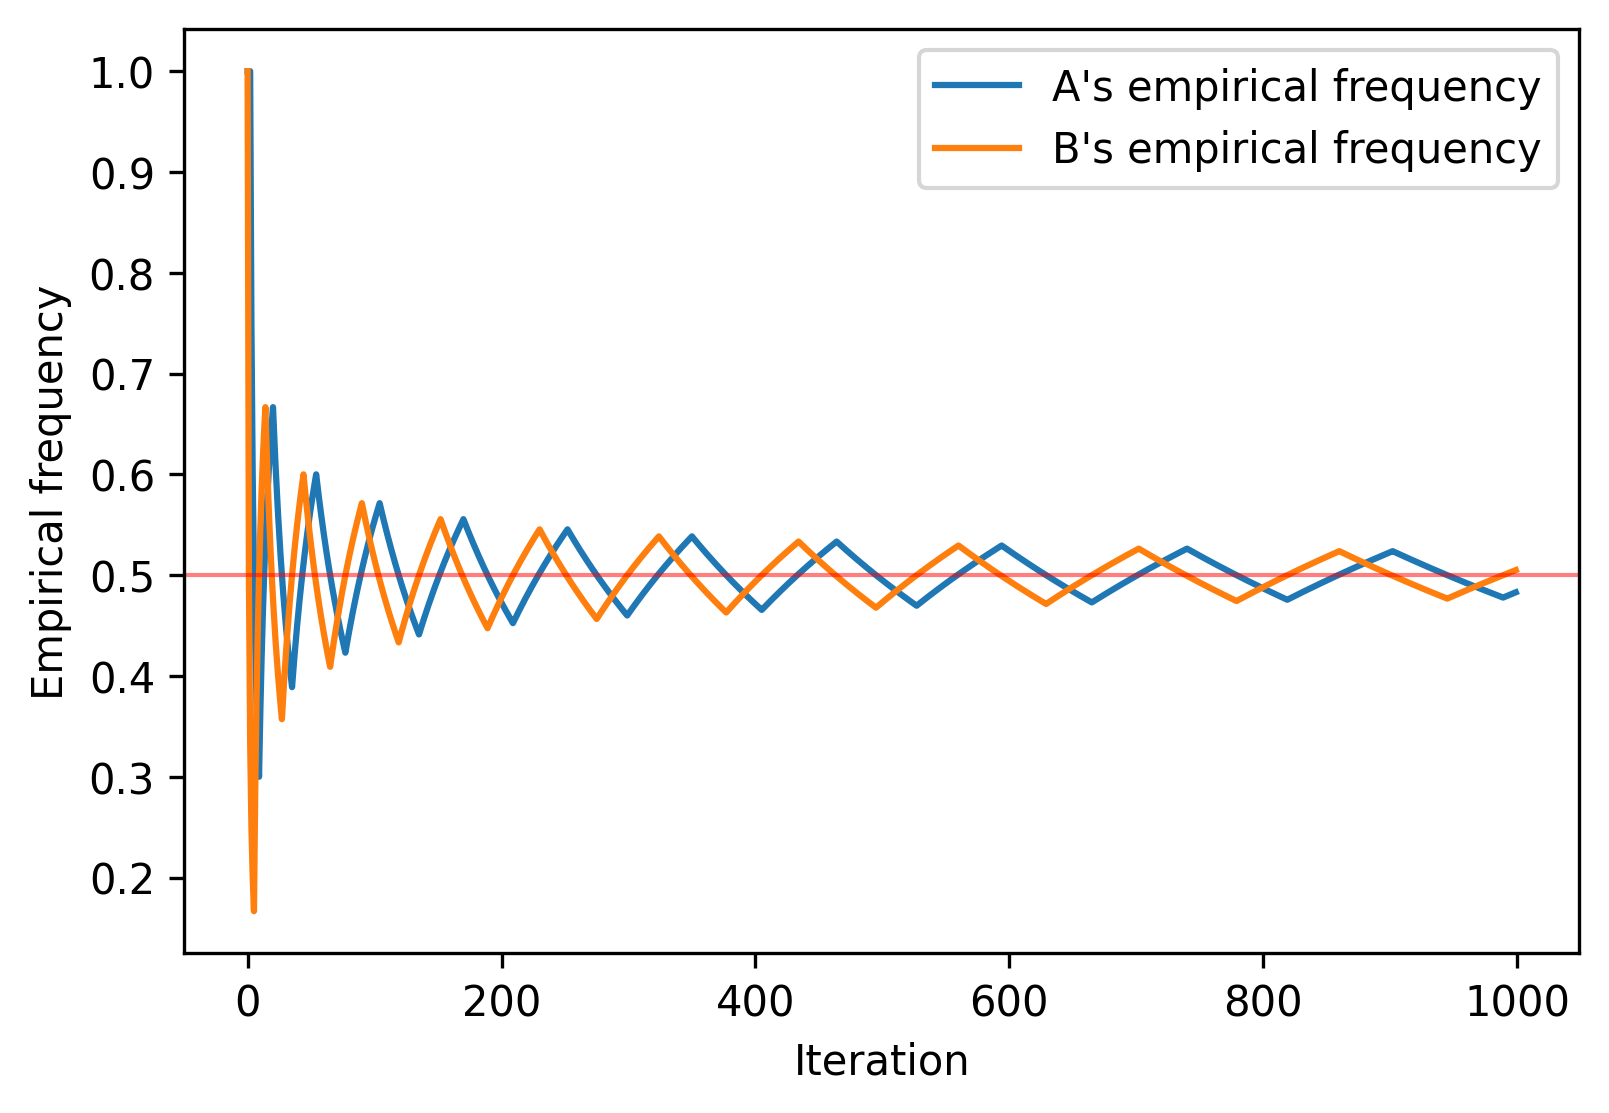

In [195]:
# plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
empirical_freq_means.plot(ax=ax)

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.axhline(0.5, alpha=0.5, color="red", linewidth=1)
ax.legend(labels=["A's empirical frequency", "B's empirical frequency"])

ax.set_xlabel("Iteration")
ax.set_ylabel("Empirical frequency")

In [196]:
# plot step by step
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.axhline(0.5, alpha=0.5, color="red", linewidth=1)

ax.set_xlabel("Iteration")
ax.set_ylabel("Empirical frequency")

plt.ylim(0,1)

filenames = []
for i in tqdm(range(0, empirical_freq_means.shape[0], 10)):
    empirical_freq_means[0:i].plot(ax=ax, color=["#1f77b4", "#ff7f0e"])
    ax.get_legend().remove()
    
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    plt.savefig("plots/" + filename)
    

# build gif
with imageio.get_writer('fictitious-play.gif', mode='I', duration=5) as writer:
    for filename in filenames:
        image = imageio.imread("plots/" + filename)
        writer.append_data(image)

/var/folders/_6/c56rsvy15k9_gv99mkdll8pc0000gn/T/ipykernel_77250/345890248.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread("plots/" + filename)
